# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [2]:
#Realizamos solicitud HTTP de la url y extraemos tablas con Pandas:
resource_url = "https://es.wikipedia.org/wiki/Anexo:Pel%C3%ADculas_con_las_mayores_recaudaciones"
response = requests.get(resource_url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    tax_table = pd.read_html(resource_url)
    df = tax_table[0]
    df = df.dropna()
    df.columns = ['orden', 'nombre_peliculas', 'recaudacion_mundial', 'taquilla_eeuu', 
                  'taquilla_out_eeuu', 'presupuesto', 'distribuidor','estreno']
df.head(2)

,orden,nombre_peliculas,recaudacion_mundial,taquilla_eeuu,taquilla_out_eeuu,presupuesto,distribuidor,estreno
0,1,Avatar,2 923 706 026,"785 221 649 (26,9 %)","2 138 484 377 (73,1 %)",246 000 000,20th Century Fox (Walt Disney Studios Motion P...,2009
1,2,Avengers: Endgame,2 799 439 100,"858 373 000 (30,7 %)","1 941 066 100 (69,3 %)",400 000 000,Walt Disney Studios Motion Pictures,2019


In [3]:
#Limpiamos datos de columnas con símbolos y espacios

df['presupuesto_n'] = df['presupuesto'].str.split(pat='-', expand=True)[0]
df['presupuesto_n'] = df['presupuesto_n'].replace('\s', '', regex=True)
df['presupuesto_n'] = df['presupuesto_n'].astype(int)

df['recaudacion_mundial'] = df['recaudacion_mundial'].replace('\s', '', regex=True)
df['recaudacion_mundial'] = df['recaudacion_mundial'].astype(int)


df['taquilla_eeuu_q'] = df['taquilla_eeuu'].str.split(pat='(', expand=True)[0]
df['taquilla_eeuu_q'] = df['taquilla_eeuu_q'].replace('\s', '', regex=True)
df['taquilla_eeuu_q'] = df['taquilla_eeuu_q'].astype(int)

df['taquilla_out_eeuu_q'] = df['taquilla_out_eeuu'].str.replace(r'\(.*', '', regex=True)
df['taquilla_out_eeuu_q'] = df['taquilla_out_eeuu_q'].replace('\s', '', regex=True)
df['taquilla_out_eeuu_q'] = df['taquilla_out_eeuu_q'].astype(int)

df.head(2)

,orden,nombre_peliculas,recaudacion_mundial,taquilla_eeuu,taquilla_out_eeuu,presupuesto,distribuidor,estreno,presupuesto_n,taquilla_eeuu_q,taquilla_out_eeuu_q
0,1,Avatar,2923706026,"785 221 649 (26,9 %)","2 138 484 377 (73,1 %)",246 000 000,20th Century Fox (Walt Disney Studios Motion P...,2009,246000000,785221649,2138484377
1,2,Avengers: Endgame,2799439100,"858 373 000 (30,7 %)","1 941 066 100 (69,3 %)",400 000 000,Walt Disney Studios Motion Pictures,2019,400000000,858373000,1941066100


In [4]:
#Eliminaré las columnas cuyos datos no son de mi interés por su formato:
df = df.drop(columns=['taquilla_eeuu', 'taquilla_out_eeuu', 'presupuesto'])
df.head(2)

,orden,nombre_peliculas,recaudacion_mundial,distribuidor,estreno,presupuesto_n,taquilla_eeuu_q,taquilla_out_eeuu_q
0,1,Avatar,2923706026,20th Century Fox (Walt Disney Studios Motion P...,2009,246000000,785221649,2138484377
1,2,Avengers: Endgame,2799439100,Walt Disney Studios Motion Pictures,2019,400000000,858373000,1941066100


In [5]:
#Establecemos conexión con SQL: 
conexion = sqlite3.connect('peliculas_taquilleras.db')
cursor = conexion.cursor()

#Enviamos a la base de datos:
df.to_sql('peliculas', conexion, if_exists='replace', index = False)
conexion. commit()

In [6]:
# Al tener la base de datos en SQL podemos trabajar con ella para obtener datos y saber que funciona correctamente:
#Consulta 1:
cursor.execute('''
    SELECT "nombre_peliculas" FROM peliculas
''')
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

('Avatar',)
('Avengers: Endgame',)
('Avatar: The Way of Water',)
('Titanic',)
('Ne Zha 2',)
('Star Wars: Episodio VII - El despertar de la Fuerza',)
('Avengers: Infinity War',)
('Spider-Man: No Way Home',)
('Inside Out 2',)
('Jurassic World',)
('El rey león',)
('The Avengers',)
('Furious 7',)
('Top Gun: Maverick',)
('Frozen II',)
('Barbie',)
('Avengers: Age of Ultron',)
('Super Mario Bros.: la película',)
('Black Panther',)
('Harry Potter y las reliquias de la Muerte: parte 2',)
('Deadpool & Wolverine',)
('Star Wars: Episodio VIII - Los últimos Jedi',)
('Jurassic World: el reino caído',)
('Frozen',)
('La bella y la bestia',)
('Los Increíbles 2',)
('The Fate of the Furious',)
('Iron Man 3',)
('Minions',)
('El Señor de los Anillos: el retorno del Rey',)
('Capitán América: Civil War',)
('Aquaman',)
('Skyfall',)
('Spider-Man: lejos de casa',)
('Capitana Marvel',)
('Transformers: el lado oscuro de la luna',)
('The Dark Knight Rises',)
('Parque Jurásico',)
('Transformers: la era de la extinc

In [7]:
# Consulta 2
cursor.execute('''
    SELECT "nombre_peliculas" FROM peliculas WHERE "presupuesto_n" > 300000000
''')
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

('Avengers: Endgame',)
('Avatar: The Way of Water',)
('Star Wars: Episodio VII - El despertar de la Fuerza',)
('Avengers: Infinity War',)
('Star Wars: Episodio VIII - Los últimos Jedi',)
('El hobbit: un viaje inesperado',)
('Piratas del Caribe: en el fin del mundo',)


In [8]:
# Consulta 3
cursor.execute('''
    SELECT "nombre_peliculas","estreno" FROM peliculas WHERE "estreno" < 2000
''')
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)
conexion.close()

('Titanic', 1997)
('Parque Jurásico', 1993)
('Star Wars: Episodio I - La amenaza fantasma', 1999)
('El rey león', 1994)


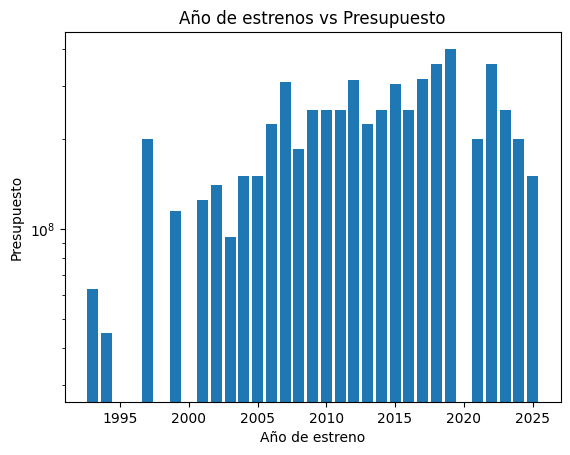

In [9]:
# Graficamos Años de Estrenos vs Presupuestos de las películas:
x = df["estreno"]
y = df["presupuesto_n"]

plt.yscale('log')
plt.bar(x, y)
plt.title('Año de estrenos vs Presupuesto')
plt.ylabel('Presupuesto')
plt.xlabel('Año de estreno')
plt.show()

Aparentemente, el coste de las películas ha incrementado con los años. Entendería que los efectos especiales requieren de más insumos, más personal y mucha creatividad.

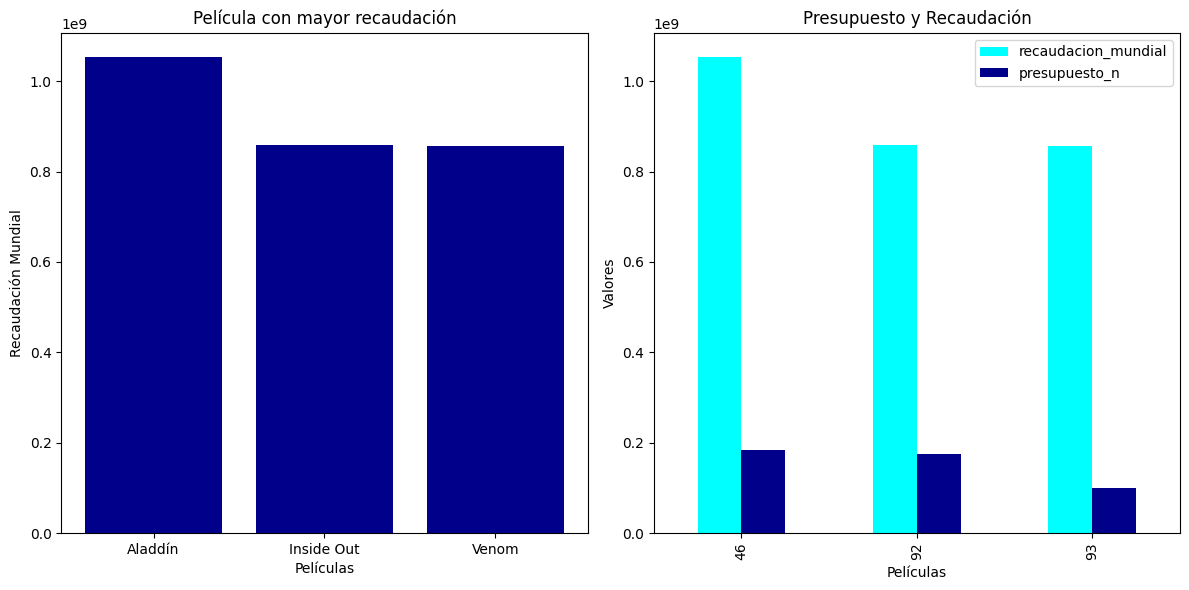

In [10]:
#Graficamos cuánto fue la recaudación mundial de tres peliculas aleatorias
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

peliculas_comparar = ['Venom', 'Inside Out', 'Aladdín']
df_peliculas_comparar = df[df['nombre_peliculas'].isin(peliculas_comparar)]

x = df_peliculas_comparar["nombre_peliculas"]
y = df_peliculas_comparar["recaudacion_mundial"]
axes[0].set_title('Película con mayor recaudación')
axes[0].bar(x, y, color="darkblue")
axes[0].set_title('Película con mayor recaudación')
axes[0].set_xlabel('Películas')
axes[0].set_ylabel('Recaudación Mundial')

#Compararé las tres peliculas de acuerdo a su presupuesto y recaudación mundial
graficar_presupuesto_recaudacion = ['recaudacion_mundial', 'presupuesto_n']
df_peliculas_comparar[graficar_presupuesto_recaudacion].plot(kind='bar', ax=axes[1], color=['cyan', 'darkblue'])
axes[1].set_title('Presupuesto y Recaudación')
axes[1].set_xlabel('Películas')
axes[1].set_ylabel('Valores')
plt.tight_layout()

Los clásicos no dejan de ser buenas películas. A pesar de ser 'caricaturezca' como Inside Out, obtuvo mucha más recaudación mundial Aladdin, con casi el mismo presupuesto y menos efectos especiales.

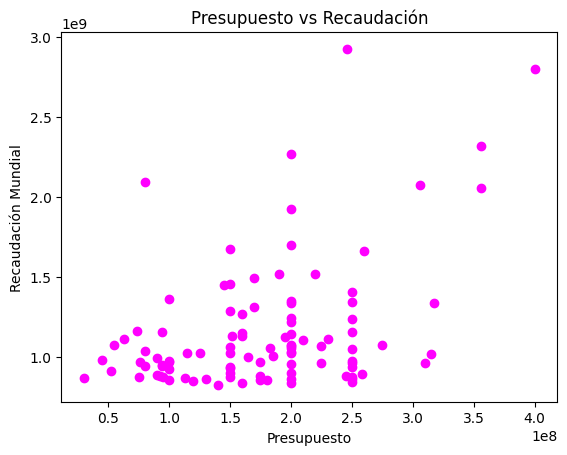

In [11]:
#Graficamos si existe relación del presupuesto de las películas con la recaudación:
x = df['presupuesto_n']
y = df['recaudacion_mundial']
plt.scatter(x, y, color ='magenta')
plt.title('Presupuesto vs Recaudación')
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación Mundial')
plt.show()

A simple vista, diría que si existe algún tipo de relación, aunque no es tan clara, asciende con menos pendiente el hecho de haber hecho una buena inversión en obtener una recaudación mayor. En pocas palabras, diría que en algunos casos cuanto mayor es el presupuesto, mayor podría ser la recaudación. 